<a href="https://colab.research.google.com/github/melihkurtaran/Fraud_Detection/blob/main/XAI_FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fraud Detection Project XAI on generated datasets**

In [67]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.subplots as sp
import seaborn as sns

In [68]:
#Connect to GitHub for faster access
!git clone https://github.com/melihkurtaran/Fraud_Detection.git

fatal: destination path 'Fraud_Detection' already exists and is not an empty directory.


In [69]:
# Upload the gendered datasets
female = pd.read_csv("Fraud_Detection/datasets/generated_datasets/adults_2550_female_urban.csv", delimiter='|')
male = pd.read_csv("Fraud_Detection/datasets/generated_datasets/adults_2550_male_urban.csv", delimiter='|')

In [70]:
female = female.rename(columns={'merch_long,,': 'merch_long'})

# Merge the dataframes
df = pd.concat([female, male])

df = df.reset_index(drop=True)

In [71]:
df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,115-04-4507,4218196001337,Kathy,Johnson,F,863 Lawrence Valleys,Homosassa,FL,34446,28.7508,...,59f060ee29e40979a362acdb04315f6e,2022-12-12,01:47:59,1670806079,shopping_net,10.13,1,fraud_Fisher-Schowalter,28.312405,"-82.745821,,"
1,115-04-4507,4218196001337,Kathy,Johnson,F,863 Lawrence Valleys,Homosassa,FL,34446,28.7508,...,faec1d6969fc4ed9b5182be0d4a0f15b,2022-12-12,03:39:36,1670812776,shopping_pos,814.04,1,fraud_Lynch Ltd,28.522520,"-81.591884,,"
2,115-04-4507,4218196001337,Kathy,Johnson,F,863 Lawrence Valleys,Homosassa,FL,34446,28.7508,...,53fa6924f0c85c2a9eeee8e5a1f604fd,2022-12-12,02:33:53,1670808833,gas_transport,969.16,1,fraud_Cummerata-Jones,27.874119,"-82.412580,,"
3,115-04-4507,4218196001337,Kathy,Johnson,F,863 Lawrence Valleys,Homosassa,FL,34446,28.7508,...,9869951e93f3dcf1ce8f8a1677741c3e,2022-12-13,03:36:20,1670898980,shopping_pos,743.97,1,fraud_Dooley Inc,29.525702,"-82.368289,,"
4,115-04-4507,4218196001337,Kathy,Johnson,F,863 Lawrence Valleys,Homosassa,FL,34446,28.7508,...,6e037c9b466baf60e97b7eb63bfe6e49,2022-12-13,01:04:54,1670889894,shopping_pos,791.05,1,fraud_Stoltenberg-Beatty,28.629166,"-83.486240,,"


No null values!

In [72]:
# Check for null values
null_df = df.isnull()

# Check if there are any null values in the original dataframe
if null_df.any().any():
    print("There are null values in the dataframe")
else:
    print("There are no null values in the dataframe")

There are no null values in the dataframe


In [73]:
#df = df.drop(['ssn', 'cc_num','first','last','city','state','zip','street','dob','acct_num','profile','trans_num','trans_date','trans_time','unix_time','merch_long'], axis=1)

# **Data Exploration**

In [74]:
df.columns

Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile',
       'trans_num', 'trans_date', 'trans_time', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long'],
      dtype='object')

Checking the imbalance for frauds

In [75]:
# Define colors and labels for the pie chart
colors = ['#00BFFF', '#FFD700']  # blue and gold
labels = ['Normal Transactions', 'Fraudulent Transactions']

# Calculate the percentage of fraudulent transactions
fraud_percentage = df['is_fraud'].value_counts(normalize=True) * 100

# Create a Pie chart with Plotly
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=fraud_percentage,
                             hole=.3)])

# Customize the chart colors, fonts, and layout
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=18,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Transactions",
    title_font=dict(size=24, color='white'),
    legend_title_font=dict(size=20, color='yellow'),
    paper_bgcolor="black",
    plot_bgcolor='black',
    font=dict(color='white', size=16)
)

# Show the chart
fig.show()

Checking the gender balance

In [76]:
# Define colors and labels for the pie chart
colors = ['#FF69B4', '#1E90FF']  # pink and blue
labels = ['Female', 'Male']

# Calculate the percentage of transactions by gender
gender_percentage = df['gender'].value_counts(normalize=True) * 100
gender_counts = df['gender'].value_counts()

# Create a Pie chart with Plotly
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=gender_percentage,
                             hole=.3)])

# Customize the chart colors, fonts, and layout
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=18,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Transactions by Gender",
    title_font=dict(size=24, color='white'),
    legend_title_font=dict(size=20, color='yellow'),
    paper_bgcolor="black",
    plot_bgcolor='black',
    font=dict(color='white', size=16)
)

# Show the chart
fig.show()


In [77]:
gender_counts

F    60301
M    51663
Name: gender, dtype: int64

Fraud Analysis based on the amount

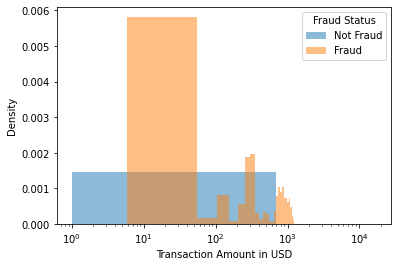

In [78]:
# Create a histogram of transaction amounts for non-fraudulent transactions
plt.hist(df[df['is_fraud']==0]['amt'], bins=25, alpha=0.5, label='Not Fraud', density=True)

# Create a histogram of transaction amounts for fraudulent transactions
plt.hist(df[df['is_fraud']==1]['amt'], bins=25, alpha=0.5, label='Fraud', density=True)

# Add labels and legend to the plot
plt.ylabel('Density')
plt.xlabel('Transaction Amount in USD')
plt.xscale('log')
plt.legend(title='Fraud Status')

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

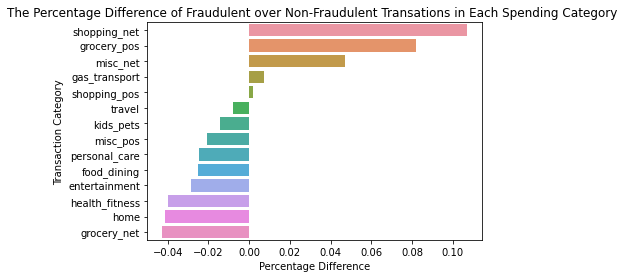

In [79]:
#calculate the percentage difference
a=df[df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=df[df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

Certain categories of spending experience a higher incidence of fraud compared to others. Transactions categorized as 'Shopping_net', 'Grocery_pos', and 'misc_net' are more susceptible to fraud, whereas transactions categorized as 'home' and 'grocery_net' are more likely to be genuine than fraudulent.

This clearly shows fraud usually happens during late night hours

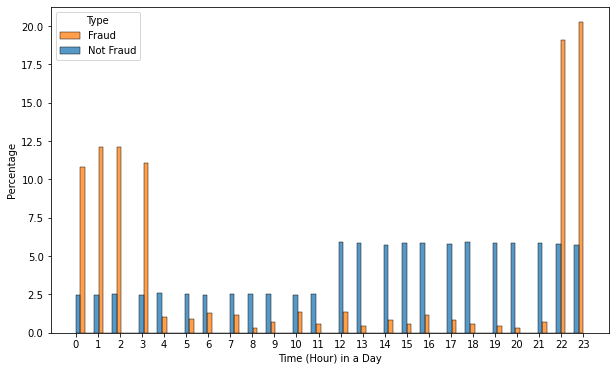

In [80]:
df['hour'] = pd.to_datetime(df['trans_time']).dt.hour
plt.figure(figsize=(10, 6))

ax = sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False, stat='percent', multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

# Show the plot
plt.show()


Based on gender, payments from males are more fradualent

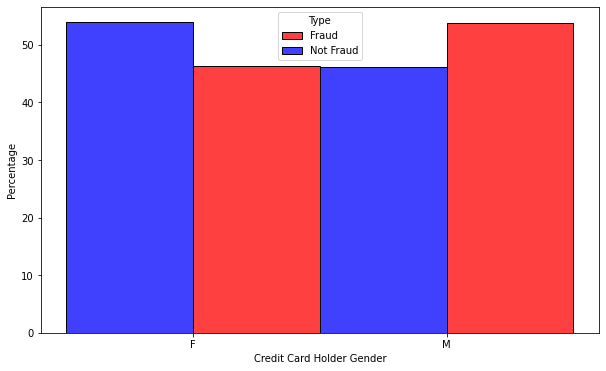

In [81]:
colors = ['blue', 'red']
plt.figure(figsize=(10, 6))

# Create a histogram of fraud counts by gender
ax = sns.histplot(x='gender', data=df, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, palette=colors)

# Add labels and legend to the plot
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
